# Technique: 01 Min-Max Normalization

### What is this?
Min-Max Normalization changes data values. It makes all numbers stay between **0 and 1**.

### Why use it?
1. Some data has very big numbers (like Salary). 
2. Some data has small numbers (like Age).
3. We use this to make them equal so the computer can learn better.

### Math Formula:
$$x' = \frac{x - \min(x)}{\max(x) - \min(x)}$$

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_generator import generate_dtt_dataset, GLOBAL_SEED

# Initialize Dataset
df = generate_dtt_dataset()
print(f'Dataset loaded with Global Seed: {GLOBAL_SEED}')
df.head()

Dataset loaded with Global Seed: 888


,Age,Annual_Salary,Household_Size,Education_Level,Region,Cluster_Feature_1,Cluster_Feature_2,Transaction_Amount
0,47,293814.560245,2.219505,Master,North,-0.666995,8.207288,3.257499
1,63,293814.560245,1.967882,High School,East,-1.843954,-8.553721,68.050678
2,55,293814.560245,1.828750,PhD,East,6.498745,-7.157678,8.111841
3,36,293814.560245,1.772328,Bachelor,East,-1.257460,-8.568788,27.766274
4,42,293814.560245,3.174114,Master,North,8.144192,-6.575686,13.867245


0    293814.560245
1    293814.560245
2    293814.560245
3    293814.560245
4    293814.560245
Name: Annual_Salary, dtype: float64


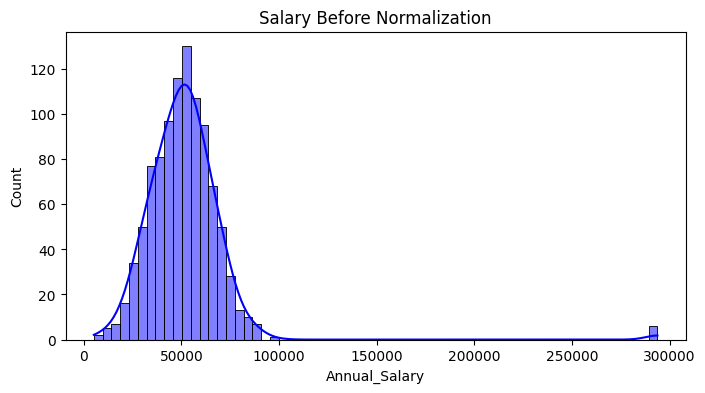

In [6]:
print(df['Annual_Salary'].head())

plt.figure(figsize=(8, 4))
sns.histplot(df['Annual_Salary'], kde=True, color='blue')
plt.title("Salary Before Normalization")
plt.show()

## How to do it with Scikit-Learn
We use a tool called `MinMaxScaler`. It is very easy to use. 
The goal is to understand the data better after it is normalized.

## Implementation

New Salary (between 0 and 1):
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Salary_MinMax, dtype: float64
Minimum value: 0.0
Maximum value: 1.0


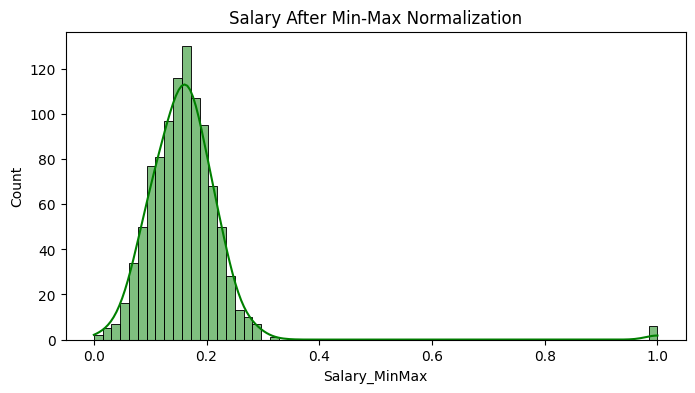

In [7]:
from sklearn.preprocessing import MinMaxScaler

# 1. Create the Scaler tool
scaler = MinMaxScaler()

# 2. Pick the column and change it
# We use [[ ]] because the tool needs a 2D shape
salary_reshaped = df[['Annual_Salary']]
df['Salary_MinMax'] = scaler.fit_transform(salary_reshaped)

# 3. Check the results
print("New Salary (between 0 and 1):")
print(df['Salary_MinMax'].head())

# 4. Check the Min and Max
print(f"Minimum value: {df['Salary_MinMax'].min()}")
print(f"Maximum value: {df['Salary_MinMax'].max()}")

# 5. Draw a picture again
plt.figure(figsize=(8, 4))
sns.histplot(df['Salary_MinMax'], kde=True, color='green')
plt.title("Salary After Min-Max Normalization")
plt.show()

### Important Note from Class:
We must look for **Outliers**. 

If one person has a huge salary, it can make all other numbers very close to 0.

This is why Exploratory Data Analysis (EDA) is important!